# Test of Data Cleaning Steps

#### The code in this Jupyter notebook is for the purpose of having a sandbox environment for me to explore the proper steps to clean the data that I collected for this project. The code is meant to be an unordered first attempt at cleaning the data into a form that's optimal for running the classification model I'm going to build before I create another Python script or Jupyter notebook that refines the code into a more streamlined format.

In [1]:
import requests
import pandas as pd
from shapely import linearrings, polygons, multipolygons

In [2]:
def get_data(resource_id):
    """
    Pull full dataset from Analyze Boston for a given resource id using api calls
    """

    # define necessary url info
    root_url = "https://data.boston.gov"
    base_api_url = "/api/3/action/datastore_search"
    limit = 1000000
    full_url = f"{root_url}{base_api_url}?resource_id={resource_id}&limit={limit}"

    # make initial request to have starting list
    r = requests.get(full_url)
    records_total = r.json()["result"]["total"]
    all_records = r.json()["result"]["records"]

    # iterate through full dataset to extend starting list until all records are pulled into the list
    while len(all_records) < records_total:
        next_url = r.json()["result"]["_links"]["next"]
        r = requests.get(root_url + next_url)
        all_records.extend(r.json()["result"]["records"])

    # convert list to dataframe and fix column order
    df = pd.DataFrame(all_records)
    return df

In [3]:
df = get_data('4582bec6-2b4f-4f9e-bc55-cbaa73117f4c')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821114 entries, 0 to 821113
Data columns (total 27 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   _id           821114 non-null  int64 
 1   businessname  821114 non-null  object
 2   dbaname       7914 non-null    object
 3   legalowner    539940 non-null  object
 4   namelast      821114 non-null  object
 5   namefirst     470503 non-null  object
 6   licenseno     821114 non-null  object
 7   issdttm       820793 non-null  object
 8   expdttm       821009 non-null  object
 9   licstatus     821114 non-null  object
 10  licensecat    821114 non-null  object
 11  descript      821114 non-null  object
 12  result        821114 non-null  object
 13  resultdttm    814715 non-null  object
 14  violation     763865 non-null  object
 15  viol_level    763865 non-null  object
 16  violdesc      758517 non-null  object
 17  violdttm      763862 non-null  object
 18  viol_status   763865 non

In [6]:
df

,_id,businessname,dbaname,legalowner,namelast,namefirst,licenseno,issdttm,expdttm,licstatus,...,violdttm,viol_status,status_date,comments,address,city,state,zip,property_id,location
0,1,1000 Degrees Pizza,None,KHOSLA VIPAN,Pasquriello LLC,Kenneth Pasquariello,313440,2017-08-14 12:49:37+00,2020-01-01 04:59:00+00,Inactive,...,2018-03-20 14:54:25+00,Fail,None,One staff person without hair restraint. Provide,55 COURT ST,BOSTON,MA,02108,156226,"(42.359259070558295, -71.05890092520981)"
1,2,1000 Degrees Pizza,None,KHOSLA VIPAN,Pasquriello LLC,Kenneth Pasquariello,313440,2017-08-14 12:49:37+00,2020-01-01 04:59:00+00,Inactive,...,2018-03-20 14:54:25+00,Fail,None,Caked on food debris on can opener blade. Clea...,55 COURT ST,BOSTON,MA,02108,156226,"(42.359259070558295, -71.05890092520981)"
2,3,1000 Degrees Pizza,None,KHOSLA VIPAN,Pasquriello LLC,Kenneth Pasquariello,313440,2017-08-14 12:49:37+00,2020-01-01 04:59:00+00,Inactive,...,2018-03-20 14:54:25+00,Fail,None,Menu was redesigned allergy statement was remo...,55 COURT ST,BOSTON,MA,02108,156226,"(42.359259070558295, -71.05890092520981)"
3,4,1000 Degrees Pizza,None,KHOSLA VIPAN,Pasquriello LLC,Kenneth Pasquariello,313440,2017-08-14 12:49:37+00,2020-01-01 04:59:00+00,Inactive,...,2018-08-08 15:54:00+00,Fail,None,Several dented cans found on storage shelves. ...,55 COURT ST,BOSTON,MA,02108,156226,"(42.359259070558295, -71.05890092520981)"
4,5,1000 Degrees Pizza,None,KHOSLA VIPAN,Pasquriello LLC,Kenneth Pasquariello,313440,2017-08-14 12:49:37+00,2020-01-01 04:59:00+00,Inactive,...,2018-08-08 15:54:00+00,Fail,None,Wet wiping cloths found on counter tops . Remo...,55 COURT ST,BOSTON,MA,02108,156226,"(42.359259070558295, -71.05890092520981)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821109,821110,Zume's Coffee House,None,KERRIGAN ROBERT,Doherty,John,27260,2012-02-06 15:50:02+00,2025-01-01 04:59:00+00,Inactive,...,None,None,None,None,219 MAIN ST,CHARLESTOWN,MA,02129,88457,"(42.376539528225585, -71.06542142208765)"
821110,821111,Zume's Coffee House,None,KERRIGAN ROBERT,Doherty,John,27260,2012-02-06 15:50:02+00,2025-01-01 04:59:00+00,Inactive,...,None,None,None,None,219 MAIN ST,CHARLESTOWN,MA,02129,88457,"(42.376539528225585, -71.06542142208765)"
821111,821112,Zume's Coffee House,None,KERRIGAN ROBERT,Doherty,John,27260,2012-02-06 15:50:02+00,2025-01-01 04:59:00+00,Inactive,...,None,None,None,None,219 MAIN ST,CHARLESTOWN,MA,02129,88457,"(42.376539528225585, -71.06542142208765)"
821112,821113,ZURITO,None,DELUTY EVAN,Biscay LLC,Babak Bina,574442,2024-10-08 12:22:09+00,2025-01-01 04:59:00+00,Active,...,None,None,None,None,26 CHARLES ST,BOSTON,MA,02108,158228,"(42.35674471417316, -71.06998852751329)"


In [7]:
df.iloc[0]

_id                                                            1
businessname                                  1000 Degrees Pizza
dbaname                                                     None
legalowner                                          KHOSLA VIPAN
namelast                                         Pasquriello LLC
namefirst                                   Kenneth Pasquariello
licenseno                                                 313440
issdttm                                   2017-08-14 12:49:37+00
expdttm                                   2020-01-01 04:59:00+00
licstatus                                               Inactive
licensecat                                                    FS
descript                                       Eating & Drinking
result                                                   HE_Fail
resultdttm                                2018-03-20 14:54:25+00
violation                                        13-2-304/402.11
viol_level               

In [13]:
df['status_date'].value_counts()

status_date
2013-10-29 19:39:07+00    88
2008-02-14 16:57:23+00    77
2008-01-28 20:38:39+00    77
2014-06-19 19:42:51+00    74
2008-02-22 20:08:33+00    71
                          ..
2007-05-30 19:31:30+00     1
2007-06-05 18:59:59+00     1
2007-06-05 18:57:25+00     1
2007-06-05 18:57:53+00     1
2020-11-24 16:25:43+00     1
Name: count, Length: 48874, dtype: int64

In [18]:
svi_df = pd.read_csv('MA_2020_SVI.csv')

In [19]:
svi_df

,ST,STATE,ST_ABBR,STCNTY,COUNTY,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,...,EP_ASIAN,MP_ASIAN,EP_AIAN,MP_AIAN,EP_NHPI,MP_NHPI,EP_TWOMORE,MP_TWOMORE,EP_OTHERRACE,MP_OTHERRACE
0,25,Massachusetts,MA,25001,Barnstable,25001010100,"Census Tract 101, Barnstable County, Massachus...",9.670394,2972,19,...,2.3,1.9,0.0,1.3,0.0,1.3,2.2,1.5,0.0,1.3
1,25,Massachusetts,MA,25001,Barnstable,25001010206,"Census Tract 102.06, Barnstable County, Massac...",19.784175,3662,326,...,0.6,0.8,0.0,1.1,0.0,1.1,5.9,3.5,1.0,1.1
2,25,Massachusetts,MA,25001,Barnstable,25001010208,"Census Tract 102.08, Barnstable County, Massac...",20.953316,1076,324,...,0.0,3.6,0.0,3.6,0.0,3.6,0.1,0.2,0.0,3.6
3,25,Massachusetts,MA,25001,Barnstable,25001010304,"Census Tract 103.04, Barnstable County, Massac...",7.084144,2495,242,...,5.7,4.6,0.0,1.6,0.0,1.6,0.6,0.8,0.0,1.6
4,25,Massachusetts,MA,25001,Barnstable,25001010306,"Census Tract 103.06, Barnstable County, Massac...",6.883579,2401,241,...,0.0,1.6,1.2,1.7,0.0,1.6,0.5,0.8,3.8,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,25,Massachusetts,MA,25027,Worcester,25027761100,"Census Tract 7611, Worcester County, Massachus...",27.533623,5205,29,...,2.7,3.4,0.0,0.8,0.0,0.8,0.0,0.8,0.0,0.8
1610,25,Massachusetts,MA,25027,Worcester,25027761200,"Census Tract 7612, Worcester County, Massachus...",9.061157,5578,621,...,24.8,6.1,0.1,0.2,0.0,0.7,5.2,3.8,1.0,1.1
1611,25,Massachusetts,MA,25027,Worcester,25027761300,"Census Tract 7613, Worcester County, Massachus...",3.909868,3463,440,...,6.6,3.5,0.0,1.1,0.0,1.1,4.1,2.4,0.4,0.6
1612,25,Massachusetts,MA,25027,Worcester,25027761401,"Census Tract 7614.01, Worcester County, Massac...",16.568837,4103,281,...,1.4,1.4,0.0,1.0,0.0,1.0,0.6,0.9,1.0,1.7


In [ ]:
census_df = get_data('c7c00291-79e1-4141-aedf-10fcb060e3ce')

In [ ]:
type(census_df['SHAPE'][0])

str

In [ ]:
census_df['SHAPE'][0]

"{'rings': [[[-71.12623360661733, 42.24267564884669], [-71.1262066065786, 42.24463464959814], [-71.12618460570727, 42.244883649187656], [-71.12613860590643, 42.24518764967289], [-71.12606660653894, 42.24548764909733], [-71.12594560648576, 42.24586164990471], [-71.12584260628196, 42.24610164973544], [-71.1257136063365, 42.24637264964153], [-71.12554760631731, 42.24666064987332], [-71.12541060653632, 42.24687465002687], [-71.12524660548767, 42.24708664961856], [-71.12506660549963, 42.24730464949215], [-71.12484360608553, 42.24761564993765], [-71.1245116059176, 42.24797464992218], [-71.12418060613494, 42.24831164958408], [-71.12411560622026, 42.24836264989968], [-71.12354060549302, 42.24895465033092], [-71.1230396058195, 42.24947465015774], [-71.12243960487524, 42.25006665025679], [-71.12264560527461, 42.25026865073606], [-71.12269060491526, 42.250296650551554], [-71.1227016056198, 42.25030765065085], [-71.12281560585625, 42.25042965049851], [-71.12283960529307, 42.25049365028326], [-71.1

In [ ]:
census_df['SHAPE'][0]

"{'rings': [[[-71.12623360661733, 42.24267564884669], [-71.1262066065786, 42.24463464959814], [-71.12618460570727, 42.244883649187656], [-71.12613860590643, 42.24518764967289], [-71.12606660653894, 42.24548764909733], [-71.12594560648576, 42.24586164990471], [-71.12584260628196, 42.24610164973544], [-71.1257136063365, 42.24637264964153], [-71.12554760631731, 42.24666064987332], [-71.12541060653632, 42.24687465002687], [-71.12524660548767, 42.24708664961856], [-71.12506660549963, 42.24730464949215], [-71.12484360608553, 42.24761564993765], [-71.1245116059176, 42.24797464992218], [-71.12418060613494, 42.24831164958408], [-71.12411560622026, 42.24836264989968], [-71.12354060549302, 42.24895465033092], [-71.1230396058195, 42.24947465015774], [-71.12243960487524, 42.25006665025679], [-71.12264560527461, 42.25026865073606], [-71.12269060491526, 42.250296650551554], [-71.1227016056198, 42.25030765065085], [-71.12281560585625, 42.25042965049851], [-71.12283960529307, 42.25049365028326], [-71.1

In [ ]:
census_df['SHAPE'][0][11:]

"[[-71.12623360661733, 42.24267564884669], [-71.1262066065786, 42.24463464959814], [-71.12618460570727, 42.244883649187656], [-71.12613860590643, 42.24518764967289], [-71.12606660653894, 42.24548764909733], [-71.12594560648576, 42.24586164990471], [-71.12584260628196, 42.24610164973544], [-71.1257136063365, 42.24637264964153], [-71.12554760631731, 42.24666064987332], [-71.12541060653632, 42.24687465002687], [-71.12524660548767, 42.24708664961856], [-71.12506660549963, 42.24730464949215], [-71.12484360608553, 42.24761564993765], [-71.1245116059176, 42.24797464992218], [-71.12418060613494, 42.24831164958408], [-71.12411560622026, 42.24836264989968], [-71.12354060549302, 42.24895465033092], [-71.1230396058195, 42.24947465015774], [-71.12243960487524, 42.25006665025679], [-71.12264560527461, 42.25026865073606], [-71.12269060491526, 42.250296650551554], [-71.1227016056198, 42.25030765065085], [-71.12281560585625, 42.25042965049851], [-71.12283960529307, 42.25049365028326], [-71.122827604771

In [ ]:
census_df['SHAPE'][0][:-58]

"{'rings': [[[-71.12623360661733, 42.24267564884669], [-71.1262066065786, 42.24463464959814], [-71.12618460570727, 42.244883649187656], [-71.12613860590643, 42.24518764967289], [-71.12606660653894, 42.24548764909733], [-71.12594560648576, 42.24586164990471], [-71.12584260628196, 42.24610164973544], [-71.1257136063365, 42.24637264964153], [-71.12554760631731, 42.24666064987332], [-71.12541060653632, 42.24687465002687], [-71.12524660548767, 42.24708664961856], [-71.12506660549963, 42.24730464949215], [-71.12484360608553, 42.24761564993765], [-71.1245116059176, 42.24797464992218], [-71.12418060613494, 42.24831164958408], [-71.12411560622026, 42.24836264989968], [-71.12354060549302, 42.24895465033092], [-71.1230396058195, 42.24947465015774], [-71.12243960487524, 42.25006665025679], [-71.12264560527461, 42.25026865073606], [-71.12269060491526, 42.250296650551554], [-71.1227016056198, 42.25030765065085], [-71.12281560585625, 42.25042965049851], [-71.12283960529307, 42.25049365028326], [-71.1

In [ ]:
census_df['SHAPE'][0][11:-58]

'[[-71.12623360661733, 42.24267564884669], [-71.1262066065786, 42.24463464959814], [-71.12618460570727, 42.244883649187656], [-71.12613860590643, 42.24518764967289], [-71.12606660653894, 42.24548764909733], [-71.12594560648576, 42.24586164990471], [-71.12584260628196, 42.24610164973544], [-71.1257136063365, 42.24637264964153], [-71.12554760631731, 42.24666064987332], [-71.12541060653632, 42.24687465002687], [-71.12524660548767, 42.24708664961856], [-71.12506660549963, 42.24730464949215], [-71.12484360608553, 42.24761564993765], [-71.1245116059176, 42.24797464992218], [-71.12418060613494, 42.24831164958408], [-71.12411560622026, 42.24836264989968], [-71.12354060549302, 42.24895465033092], [-71.1230396058195, 42.24947465015774], [-71.12243960487524, 42.25006665025679], [-71.12264560527461, 42.25026865073606], [-71.12269060491526, 42.250296650551554], [-71.1227016056198, 42.25030765065085], [-71.12281560585625, 42.25042965049851], [-71.12283960529307, 42.25049365028326], [-71.122827604771

In [ ]:
census_df['SHAPE'][0][12:-60].split('], ')

['[-71.12623360661733, 42.24267564884669',
 '[-71.1262066065786, 42.24463464959814',
 '[-71.12618460570727, 42.244883649187656',
 '[-71.12613860590643, 42.24518764967289',
 '[-71.12606660653894, 42.24548764909733',
 '[-71.12594560648576, 42.24586164990471',
 '[-71.12584260628196, 42.24610164973544',
 '[-71.1257136063365, 42.24637264964153',
 '[-71.12554760631731, 42.24666064987332',
 '[-71.12541060653632, 42.24687465002687',
 '[-71.12524660548767, 42.24708664961856',
 '[-71.12506660549963, 42.24730464949215',
 '[-71.12484360608553, 42.24761564993765',
 '[-71.1245116059176, 42.24797464992218',
 '[-71.12418060613494, 42.24831164958408',
 '[-71.12411560622026, 42.24836264989968',
 '[-71.12354060549302, 42.24895465033092',
 '[-71.1230396058195, 42.24947465015774',
 '[-71.12243960487524, 42.25006665025679',
 '[-71.12264560527461, 42.25026865073606',
 '[-71.12269060491526, 42.250296650551554',
 '[-71.1227016056198, 42.25030765065085',
 '[-71.12281560585625, 42.25042965049851',
 '[-71.1228396

In [ ]:
testlist1

['[-71.12623360661733, 42.24267564884669]',
 '[-71.1262066065786, 42.24463464959814]',
 '[-71.12618460570727, 42.244883649187656]',
 '[-71.12613860590643, 42.24518764967289]',
 '[-71.12606660653894, 42.24548764909733]',
 '[-71.12594560648576, 42.24586164990471]',
 '[-71.12584260628196, 42.24610164973544]',
 '[-71.1257136063365, 42.24637264964153]',
 '[-71.12554760631731, 42.24666064987332]',
 '[-71.12541060653632, 42.24687465002687]',
 '[-71.12524660548767, 42.24708664961856]',
 '[-71.12506660549963, 42.24730464949215]',
 '[-71.12484360608553, 42.24761564993765]',
 '[-71.1245116059176, 42.24797464992218]',
 '[-71.12418060613494, 42.24831164958408]',
 '[-71.12411560622026, 42.24836264989968]',
 '[-71.12354060549302, 42.24895465033092]',
 '[-71.1230396058195, 42.24947465015774]',
 '[-71.12243960487524, 42.25006665025679]',
 '[-71.12264560527461, 42.25026865073606]',
 '[-71.12269060491526, 42.250296650551554]',
 '[-71.1227016056198, 42.25030765065085]',
 '[-71.12281560585625, 42.250429650

In [ ]:
testlist1 = [x+']' for x in census_df['SHAPE'][0][12:-60].split('], ')]

In [ ]:
str.replace(testlist1[0].split(', ')[0], '[', '')

'-71.12623360661733'

In [ ]:
float(str.replace(testlist1[0].split(', ')[1], ']', ''))

42.24267564884669

In [ ]:
testlist2 = [[float(str.replace(x.split(', ')[0], '[', '')), float(str.replace(x.split(', ')[1], ']', ''))] for x in testlist1]

In [ ]:
testlist2

[[-71.12623360661733, 42.24267564884669],
 [-71.1262066065786, 42.24463464959814],
 [-71.12618460570727, 42.244883649187656],
 [-71.12613860590643, 42.24518764967289],
 [-71.12606660653894, 42.24548764909733],
 [-71.12594560648576, 42.24586164990471],
 [-71.12584260628196, 42.24610164973544],
 [-71.1257136063365, 42.24637264964153],
 [-71.12554760631731, 42.24666064987332],
 [-71.12541060653632, 42.24687465002687],
 [-71.12524660548767, 42.24708664961856],
 [-71.12506660549963, 42.24730464949215],
 [-71.12484360608553, 42.24761564993765],
 [-71.1245116059176, 42.24797464992218],
 [-71.12418060613494, 42.24831164958408],
 [-71.12411560622026, 42.24836264989968],
 [-71.12354060549302, 42.24895465033092],
 [-71.1230396058195, 42.24947465015774],
 [-71.12243960487524, 42.25006665025679],
 [-71.12264560527461, 42.25026865073606],
 [-71.12269060491526, 42.250296650551554],
 [-71.1227016056198, 42.25030765065085],
 [-71.12281560585625, 42.25042965049851],
 [-71.12283960529307, 42.250493650283

In [ ]:
testpoly = polygons(testlist2)

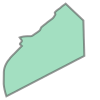

In [ ]:
testpoly

In [ ]:
testlist2

[[-71.12623360661733, 42.24267564884669],
 [-71.1262066065786, 42.24463464959814],
 [-71.12618460570727, 42.244883649187656],
 [-71.12613860590643, 42.24518764967289],
 [-71.12606660653894, 42.24548764909733],
 [-71.12594560648576, 42.24586164990471],
 [-71.12584260628196, 42.24610164973544],
 [-71.1257136063365, 42.24637264964153],
 [-71.12554760631731, 42.24666064987332],
 [-71.12541060653632, 42.24687465002687],
 [-71.12524660548767, 42.24708664961856],
 [-71.12506660549963, 42.24730464949215],
 [-71.12484360608553, 42.24761564993765],
 [-71.1245116059176, 42.24797464992218],
 [-71.12418060613494, 42.24831164958408],
 [-71.12411560622026, 42.24836264989968],
 [-71.12354060549302, 42.24895465033092],
 [-71.1230396058195, 42.24947465015774],
 [-71.12243960487524, 42.25006665025679],
 [-71.12264560527461, 42.25026865073606],
 [-71.12269060491526, 42.250296650551554],
 [-71.1227016056198, 42.25030765065085],
 [-71.12281560585625, 42.25042965049851],
 [-71.12283960529307, 42.250493650283

In [ ]:
len(testlist2)

166

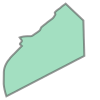

In [ ]:
testpoly

In [ ]:
def makeCoords(dfrow):
    fmtstr = str.replace(dfrow, "{'rings': [", "")
    finalfmtstr = str.replace(fmtstr, "], 'spatialReference': {'latestWkid': 4326, 'wkid': 4326}}", "")
    initlist = finalfmtstr.split('], ')
    return [[float(str.replace(x.split(', ')[0], '[', '')), float(str.replace(x.split(', ')[1], ']', ''))] for x in initlist]

In [ ]:
census_df['Shape Coords'] = census_df['SHAPE'].apply(lambda x: makeCoords(x))

In [ ]:
census_df

,_id,geoid20,countyfp20,namelsad20,statefp20,tractce20,intptlat20,name20,funcstat20,intptlon20,mtfcc20,aland20,awater20,objectid,SHAPE,Shape Coords
0,1,25025140202,025,Census Tract,25,140202,+42.2495181,1402.02,S,-071.1175430,G5020,1538599.0,17120.0,1,"{'rings': [[[-71.12623360661733, 42.2426756488...","[[-71.12623360661733, 42.24267564884669], [-71..."
1,2,25025140300,025,Census Tract,25,140300,+42.2587734,1403,S,-071.1188131,G5020,1548879.0,38736.0,2,"{'rings': [[[-71.13011560733405, 42.2511796505...","[[-71.13011560733405, 42.25117965050007], [-71..."
2,3,25025140400,025,Census Tract,25,140400,+42.2692219,1404,S,-071.1118088,G5020,1874512.0,11680.0,3,"{'rings': [[[-71.12491460728612, 42.2727076542...","[[-71.12491460728612, 42.272707654247284], [-7..."
3,4,25025140106,025,Census Tract,25,140106,+42.2738738,1401.06,S,-071.1371416,G5020,278837.0,3116.0,4,"{'rings': [[[-71.14069361238155, 42.2747036545...","[[-71.14069361238155, 42.2747036545476], [-71...."
4,5,25025110201,025,Census Tract,25,110201,+42.2804960,1102.01,S,-071.1170508,G5020,348208.0,0.0,5,"{'rings': [[[-71.11999360559918, 42.2788276558...","[[-71.11999360559918, 42.27882765582119], [-71..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,203,25025060603,025,Census Tract,25,060603,+42.3477038,606.03,S,-071.0411470,G5020,398230.0,0.0,201,"{'rings': [[[-71.04756658623148, 42.3490676720...","[[-71.04756658623148, 42.34906767204186], [-71..."
203,204,25025070802,025,Census Tract,25,070802,+42.3417055,708.02,S,-071.0802334,G5020,129953.0,0.0,202,"{'rings': [[[-71.08315159729354, 42.3416306693...","[[-71.08315159729354, 42.34163066934546], [-71..."
204,205,25025061202,025,Census Tract,25,061202,+42.3387527,612.02,S,-071.0625085,G5020,380810.0,4897.0,203,"{'rings': [[[-71.06553059192447, 42.3360376684...","[[-71.06553059192447, 42.336037668466325], [-7..."
205,206,25025070801,025,Census Tract,25,070801,+42.3399771,708.01,S,-071.0825322,G5020,61235.0,0.0,204,"{'rings': [[[-71.08468159864695, 42.3403016688...","[[-71.08468159864695, 42.340301668816245], [-7..."


In [ ]:
census_df['Polygons'] = census_df['Shape Coords'].apply(lambda x: polygons(x))

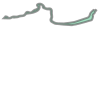

In [ ]:
census_df['Polygons'][206]